In [84]:
import numpy as np, matplotlib.pyplot as plt
from math import pi
import time

Параметры заданные преподавателем:

$$ c = 1,65 $$
$$ k = 0,59 $$
$$ R = 5 $$
$$ u_c = 0 $$
$$ l = 0,5 $$
$$ \alpha = 0,003 $$
$$ T = 40 $$
$$ \psi(\theta) = u_c + cos^4 (\theta) $$

In [85]:
c = 1.65
k = 0.59
R = 5
uc = 0
l = 0.5
alpha = 0.003
T = 40

I = 64
K = I*64
print('K/I =', K/I)
t = np.linspace(0, T, K + 1)
theta = np.linspace(0.001, pi-0.001, I + 1)
h_t = t[2] - t[1]
h_theta = theta[2] - theta[1]
def psi(theta):
    return uc + np.cos(theta) ** 4

K/I = 64.0


In [86]:
v = np.zeros([K + 1, I + 1])
v[0, :] = psi(theta)

In [87]:
gam = k * h_t / (R ** 2) / c / (h_theta ** 2)
beta = alpha * h_t / l / c
omega = k * h_t / (R ** 2) / np.tan(theta) / 2 / h_theta / c

In [88]:
t0_ex = time.time()
for k_ind in range(1, K + 1):
    v[k_ind, 0] = (1 - beta - 2 * gam) * v[k_ind - 1, 0] + 2 * gam * (v[k_ind - 1, 1])
    for i_ind in range(1, I):
        v[k_ind, i_ind] = (1 - 2 * gam - beta) * v[k_ind - 1, i_ind] + (omega[i_ind] + gam) * v[k_ind - 1, i_ind + 1] + (gam - omega[i_ind]) * v[k_ind - 1, i_ind - 1]
    v[k_ind, I] = (1 - beta - 2 * gam) * v[k_ind - 1, I] + 2 * gam * (v[k_ind - 1, I - 1])
print('Время подсчета: ', time.time() - t0_ex)

Время подсчета:  1.1946380138397217


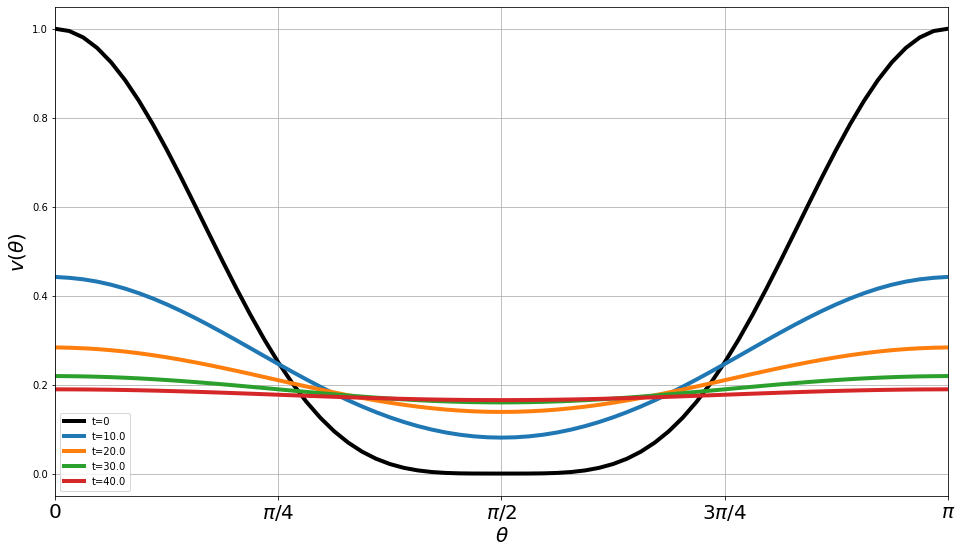

In [89]:
f = plt.figure(figsize=[16, 9])
plt.plot(theta, v[0, :], lw=4, c='black', label='t=0')
for coef in [1/4, 1/2, 3/4, 1]:
    plt.plot(theta, v[int(K * coef), :], lw=4, label='t='+str(t[int(K * coef)]))
    # print('Отклонение от неявной схемы для t =', t[int(K * coef)], '=', sum(np.abs(v[int(K * coef), :] - v_prog[int(K * coef), :]) ** 2))

plt.xlim([theta[1], theta[-1]])
plt.xlabel('${\\theta}$', fontsize=20)
plt.ylabel('${v(\\theta)}$', fontsize=20)
plt.xticks([0, pi/4, pi/2, 3*pi/4, pi], ['0', '$\\pi / 4$', '$\\pi / 2$', '$3 \\pi / 4$', '$\\pi$'], fontsize=20)
# plt.yticks([0, 0.5, 1], ['0', '0.5', '1'], fontsize=20)
plt.legend()
plt.grid()
plt.show()

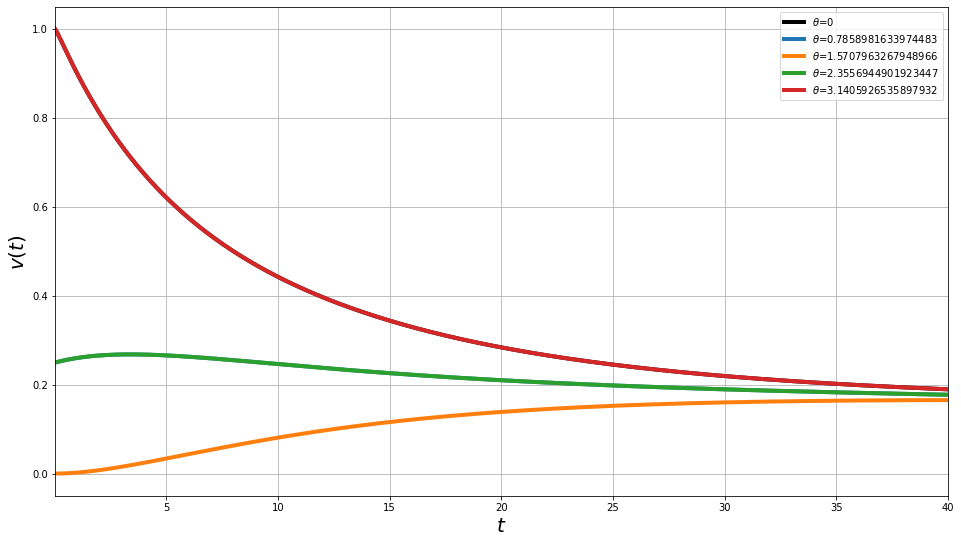

In [90]:
f = plt.figure(figsize=[16, 9])
plt.plot(t, v[:, 0], lw=4, c='black', label='$\\theta$=0')
for ind in [int(I / 4), int(I / 2), int(3 * I / 4), I]:
    plt.plot(t, v[:, ind], lw=4, label='$\\theta$='+str(theta[ind]))
plt.xlim([t[1], t[-1]])
plt.xlabel('$t$', fontsize=20)
plt.ylabel('${v(t)}$', fontsize=20)
plt.legend()
plt.grid()
plt.show()

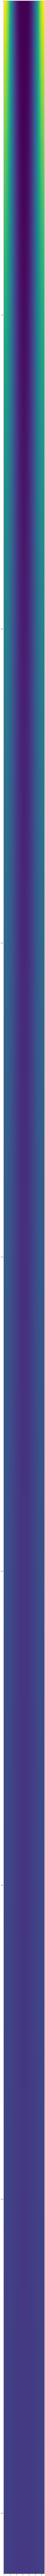

In [91]:
f = plt.figure(figsize=[64, 500])
plt.imshow(v)
plt.show()